<a href="https://colab.research.google.com/github/PythonDSBook/notebooks/blob/main/Chapter10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第10章 線形回帰

## 10.8 プログラミング

### コード 10.1 ライブラリのインポート

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### コード 10.2 データフレームの作成

In [12]:
california = fetch_california_housing()
X = california.data
y = california.target
df = pd.DataFrame(data=X,
                    columns=california.feature_names)

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### コード 10.3 訓練データとテストデータ

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### コード 10.4 特徴の標準化

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### プログラム 10.1 関数`gradient_descent_simple`

In [15]:
def gradient_descent_simple(X, y, eta, n_iter):
  m = len(X)
  w, b = 0.0, 0.0
  history = []

  for _ in range(n_iter):
    y_pred = w * X + b
    error = y_pred - y
    w = w - eta * (1 / m) * np.sum(X * error)
    b = b - eta * (1 / m) * np.sum(error)
    cost = (1 / m) * np.sum(error ** 2)
    history.append(cost)

  return w, b, history

### コード 10.5 関数`gradient_descent_simple`の実行

In [16]:
eta = 0.1
n_iter = 100
feature = 0
w, b, history = gradient_descent_simple(
    X_train[:, feature], y_train, eta, n_iter
)
print(f'cost: {history[-1]:.4f}')
print(f'w: {w:.3f}, b: {b:.3f}')

cost: 0.6980
w: 0.791, b: 2.065


In [ ]:
eta = 0.1
n_iter = 100
feature = 0
w, b, history = gradient_descent_simple(X_train[:, feature], y_train, eta, n_iter)
print(f'cost: {history[-1]:.4f}')
print(f'w: {w:.3f}, b: {b:.3f}')

cost: 0.6980
w: 0.791, b: 2.065


### 図 10.6

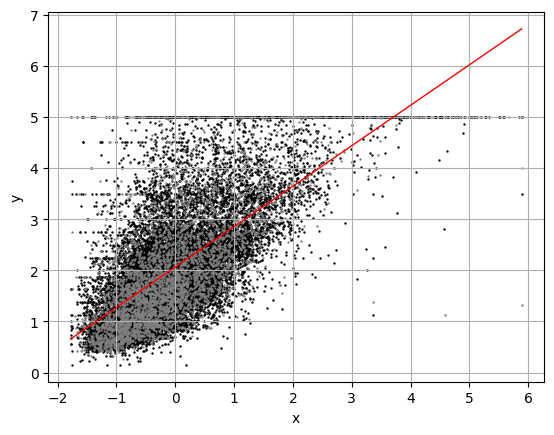

In [17]:
X_plot = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
plt.scatter(X_train[:, 0], y_train, color='black', s=0.5)
plt.scatter(X_test[:, 0], y_test, color='gray', s=0.5)
plt.plot(X_plot, w * X_plot + b, color='red', lw=1)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

### コード 10.6 決定係数の計算

In [18]:
y_train_pred = X_train[:, feature] * w + b
y_test_pred = X_test[:, feature] * w + b
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'train r2: {r2_train:.4f}, test r2: {r2_test:.4f}')

train r2: 0.4725, test r2: 0.4770


### プログラム 10.2 関数`gradient_descent`

In [19]:
def gradient_descent(X, y, eta, n_iter):
  m = X.shape[0]
  w = np.zeros(X.shape[1])
  history = []

  for _ in range(n_iter):
    y_pred = np.dot(X, w)
    error = y_pred - y
    w = w - eta * (1 / m) * np.dot(X.T, error)
    cost = (1 / m) * np.sum(error ** 2)
    history.append(cost)

  return w, history

### コード 10.7 列の追加

In [20]:
X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)

### コード 10.8 関数`gradient_descent`の実行

In [21]:
eta = 0.1
n_iter = 5000
w, history = gradient_descent(
  X_train, y_train, eta, n_iter
)
print(f'cost: {history[-1]:.4f}')
print('w: ', np.round(w, 3))

cost: 0.5195
w:  [ 2.065  0.819  0.118 -0.26   0.308 -0.003 -0.031 -0.918 -0.886]


In [22]:
eta = 0.1
n_iter = 5000
w, history = gradient_descent(X_train, y_train, eta, n_iter)
print(f'cost: {history[-1]:.4f}')
print('w: ', np.round(w, 3))

cost: 0.5195
w:  [ 2.065  0.819  0.118 -0.26   0.308 -0.003 -0.031 -0.918 -0.886]


### コード 10.9 決定係数の計算

In [23]:
y_train_pred = np.dot(X_train, w)
y_test_pred = np.dot(X_test, w)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'train r2: {r2_train:.4f}, test r2: {r2_test:.4f}')

train r2: 0.6074, test r2: 0.6010


### コード 10.10 正規方程式

In [24]:
def normal_equation(X, y):
  w = np.linalg.inv(X.T @ X) @ X.T @ y
  return w

In [25]:
w = normal_equation(X_train, y_train)
print('w: ', np.round(w, 3))

w:  [ 2.065  0.819  0.118 -0.26   0.308 -0.003 -0.031 -0.918 -0.886]


### コード 10.11 scikit-learnの`LinearRegression`クラスによる線形回帰

In [26]:
X = california.data
y = california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
print(f'intercept: {model.intercept_:.3f}')
print('coef: ', np.round(model.coef_, 3))

y_pred = model.predict(X_test)
loss = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'mean_squared_error: {loss:.4f}')
print(f'r2_score: {r2:.4f}')

intercept: 2.065
coef:  [ 0.819  0.118 -0.26   0.308 -0.003 -0.031 -0.918 -0.886]
mean_squared_error: 0.5445
r2_score: 0.6010
